# Exercise 1

## a)

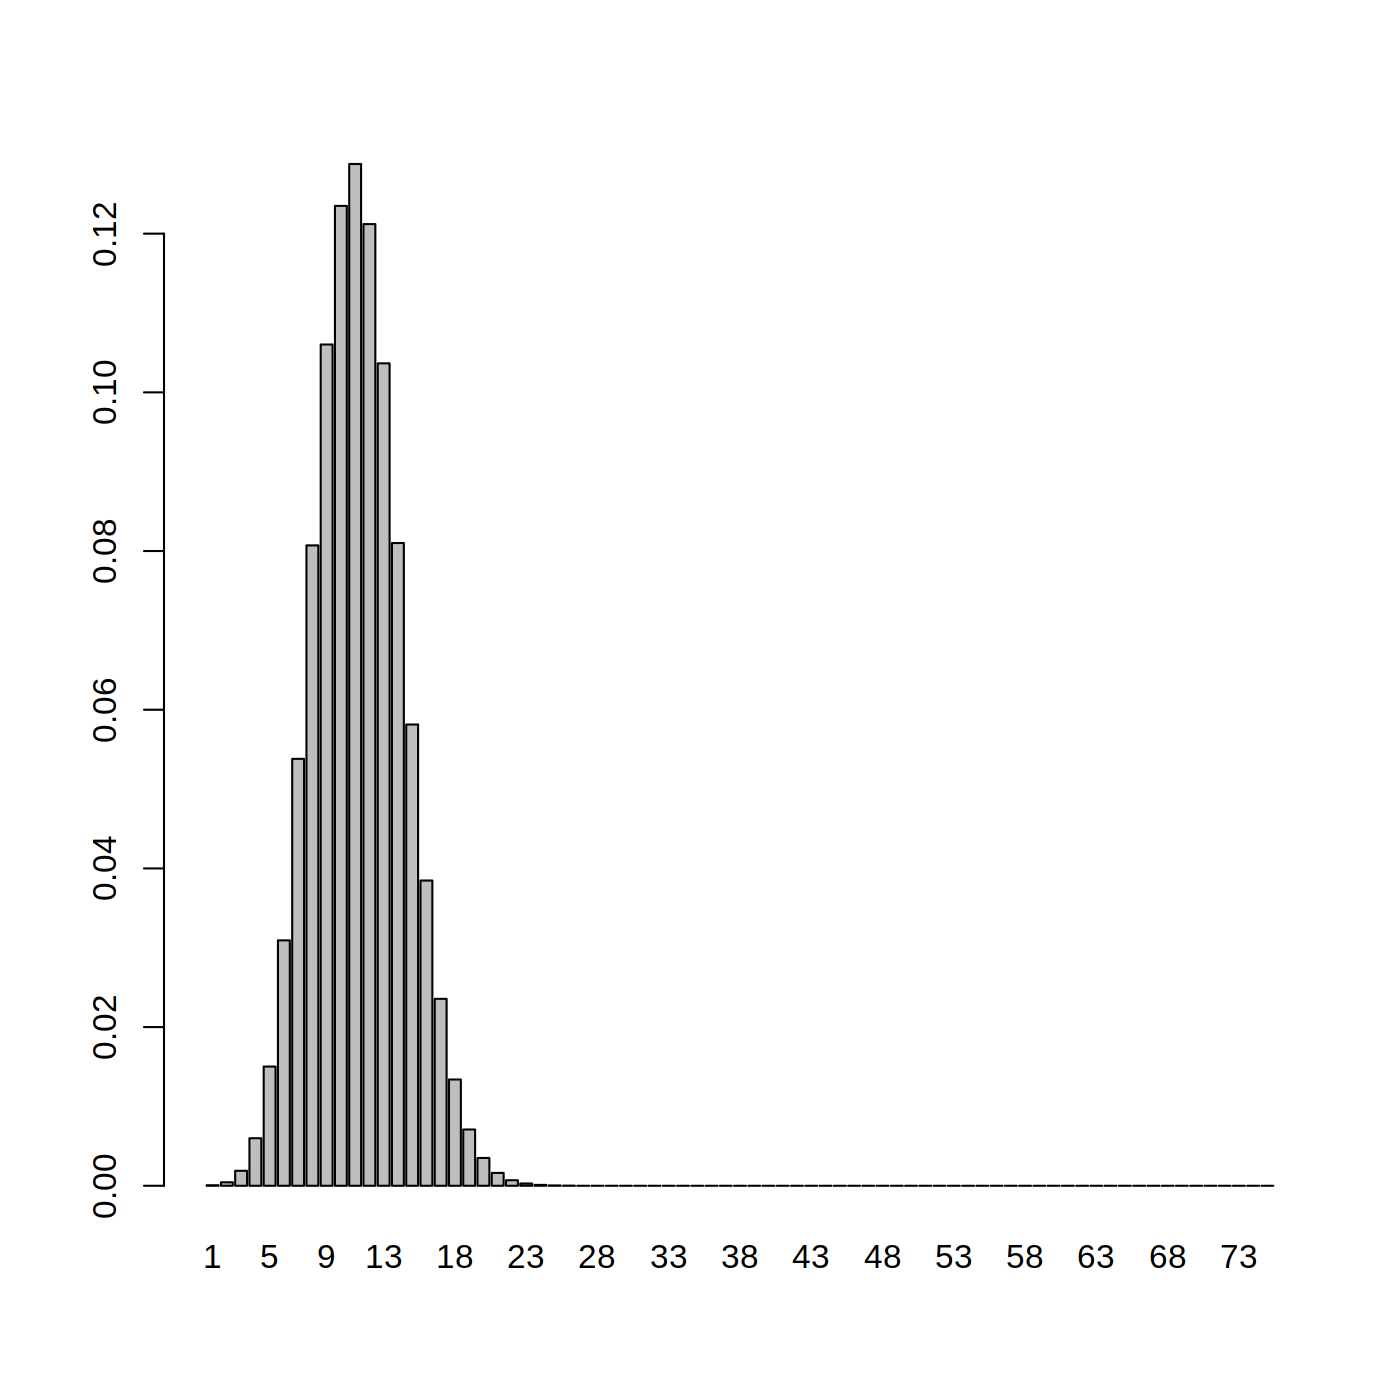

In [1]:
n <- 75
y <- .15

options(repr.plot.height=7, repr.plot.width=7, repr.plot.res=200)
barplot(dbinom(1:75, n, y), names.arg=1:75)

## b)

In [2]:
cat(6 / 75)

0.08

## c)

[1] 6.825765

[1] 73.67934

[1] 0.08478674

[1] 0.0009520625

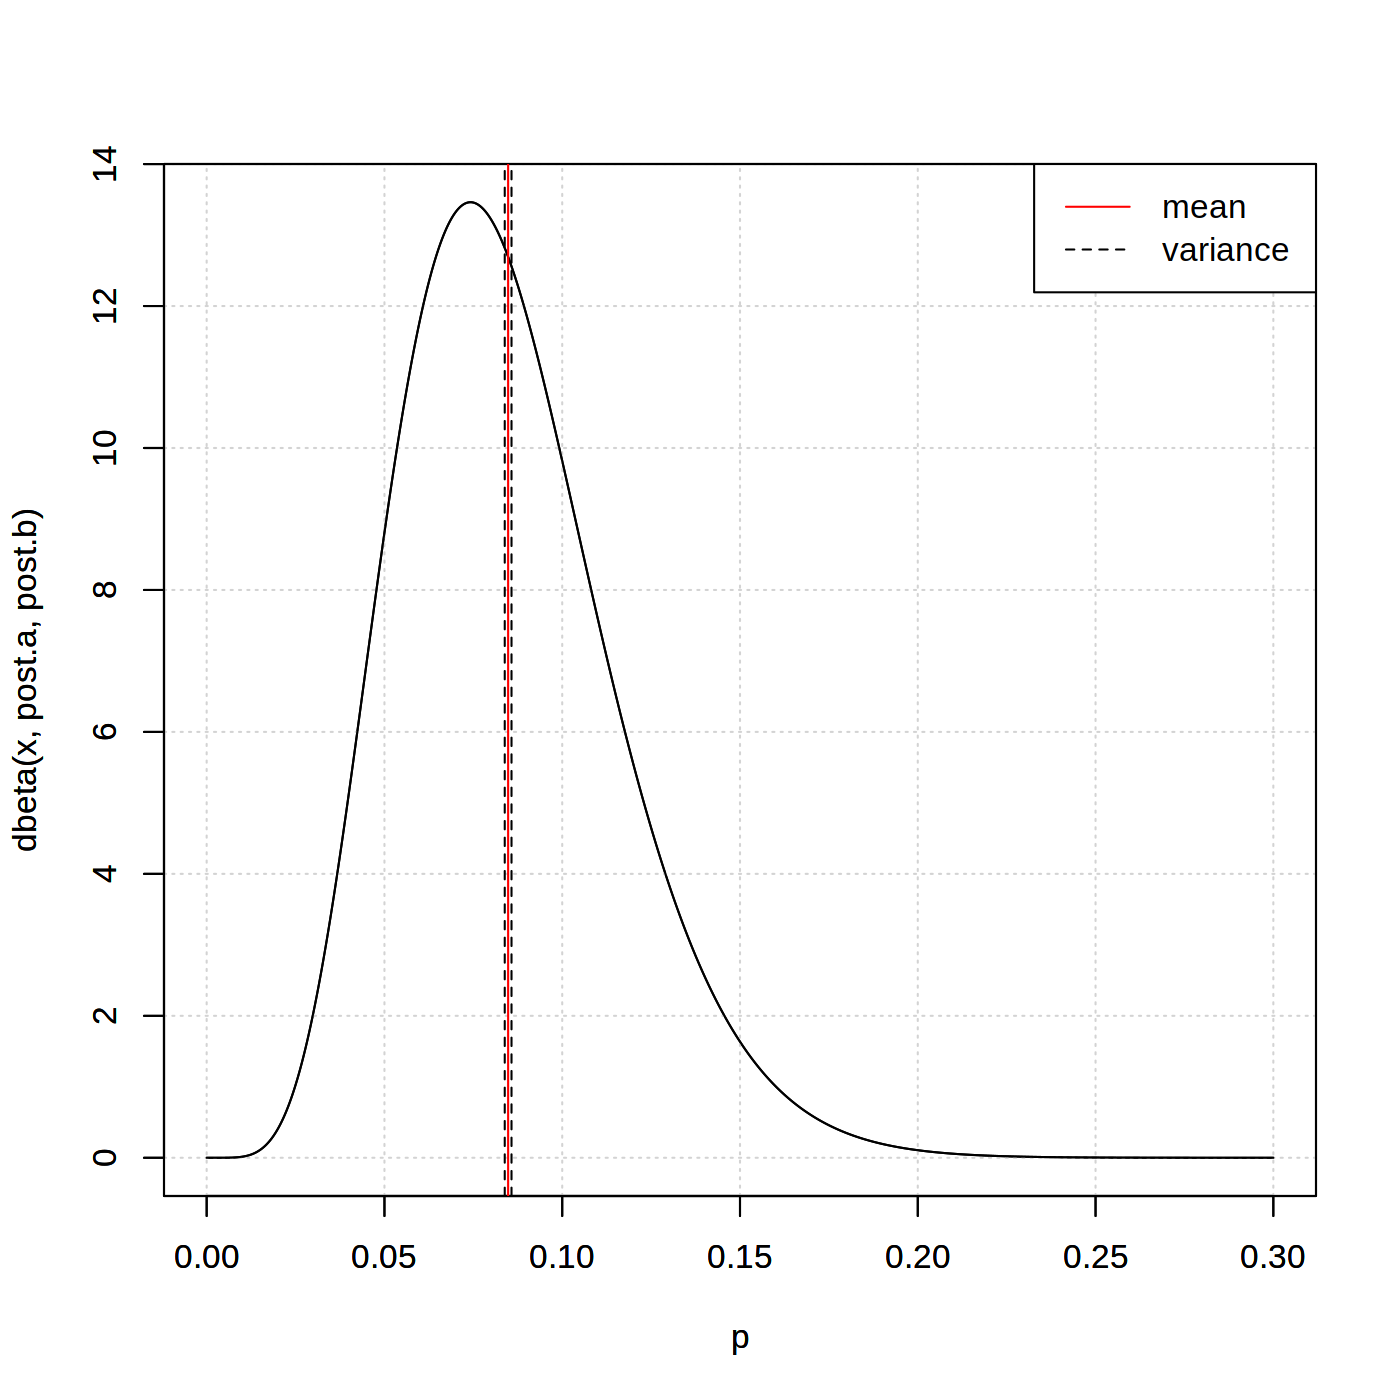

In [3]:
m <- .15; s <- .14
a <- m^3 / s^2 * (1 / m - 1) - m
b <- a / m - a
post.a <- a + 6; post.b <- b + 75 - 6
x <- seq(0, .3, length.out=1e4)

post.m <- post.a / (post.a + post.b)
post.var <- post.a * post.b / ((post.a + post.b)^2 * (post.a + post.b + 1))

plot(x, dbeta(x, post.a, post.b), type='l', xlab='p')
grid()
par(new=T)
plot(x, dbeta(x, post.a, post.b), type='l', xlab='p')
abline(v=c(post.m, post.m + post.var, post.m - post.var), lty=c(1,2,2), col=c('red', 'black', 'black'))
legend('topright', legend=c('mean', 'variance'), lty=c(1,2), col=c('red', 'black'))
post.a; post.b; post.m; post.var

## d)

In [4]:
pbeta(.15, post.a, post.b, lower.tail=F)

[1] 0.03127933

The null hypothesis is rejected

## e)

[1] 0.0543533

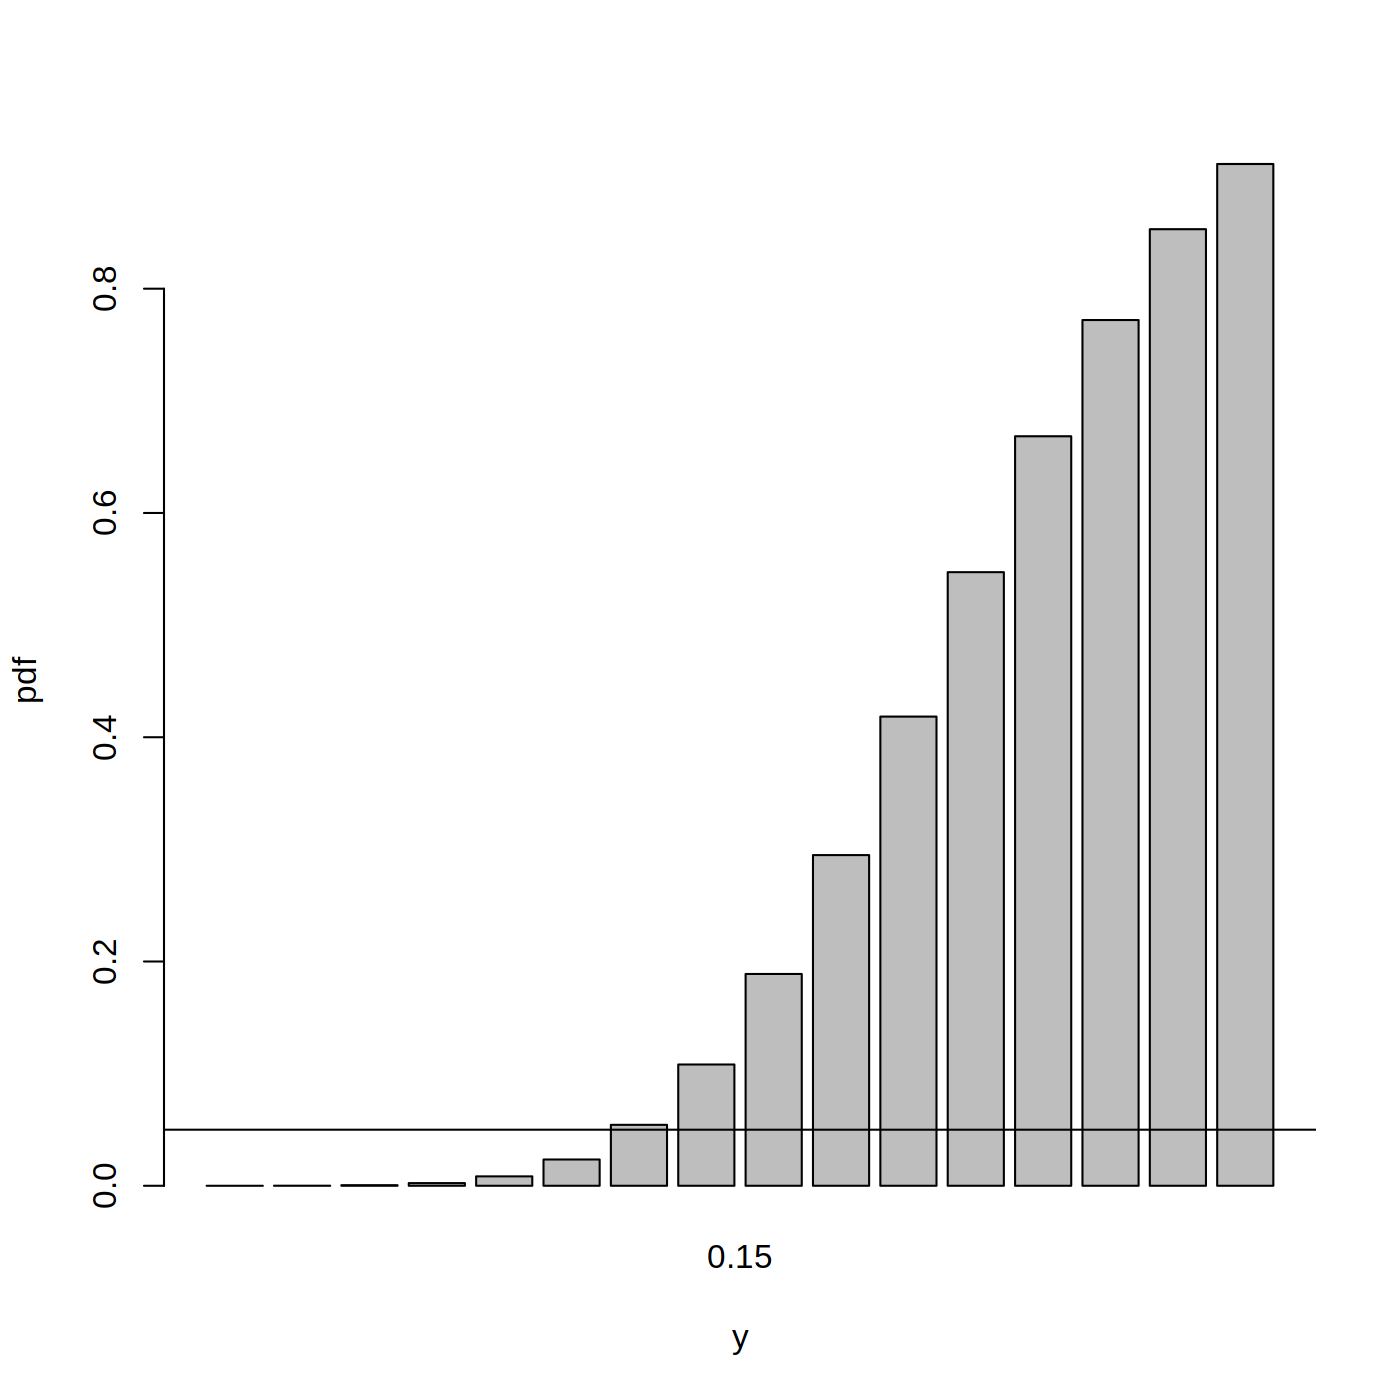

In [5]:
barplot(pbinom(0:15, 75, .15),names.arg=y, xlab = "y", ylab = "pdf") 
abline(h=0.05)
pbinom(6, 75, .15)

The null hypothesis is not rejected

# Exercise 2

## a)

In [6]:
num <- c(0.269, 0.344, 0.802, 0.418, 0.433, 0.835, 0.52, 0.139, 0.243, 0.294, 0.723, 0.493, 0.504, 0.428, 0.27, 0.53, 0.057, 0.585, 0.288, 0.171)
b <- seq(0, 15, length.out=1e3)

like <- function(b, num) {prod(dbeta(num, 2, b))} 
likes <- sapply(b, like, num=num)

prior <- function(b){  
    if (b >= 0.1 & b < 2) {return(0.2 * b)}
    else if (b >= 2 & b < 4) {return(1 / (0.8 * sqrt(2 * pi)) * exp(-(b - 2.8)**2 / (2 * 0.8**2)))} 
    else if (b >= 4 & b <= 10) {return(0.1)}
    else {return(0)}
}

priors <- sapply(b, prior)

posts <- priors * likes / sum(priors * likes)

post.m <- sum(b * posts)
post.sig <- sqrt(sum(b**2 * posts) - post.m**2)

post.m ; post.sig

[1] 2.80887

[1] 0.433969

## b)

In [7]:
cs <- cumsum(posts) ; cred.min <- min(b[cs >= .025]) ; cred.max <- max(b[cs <= 0.975]); cred.min ; cred.max

[1] 1.966967

[1] 3.663664

## c)

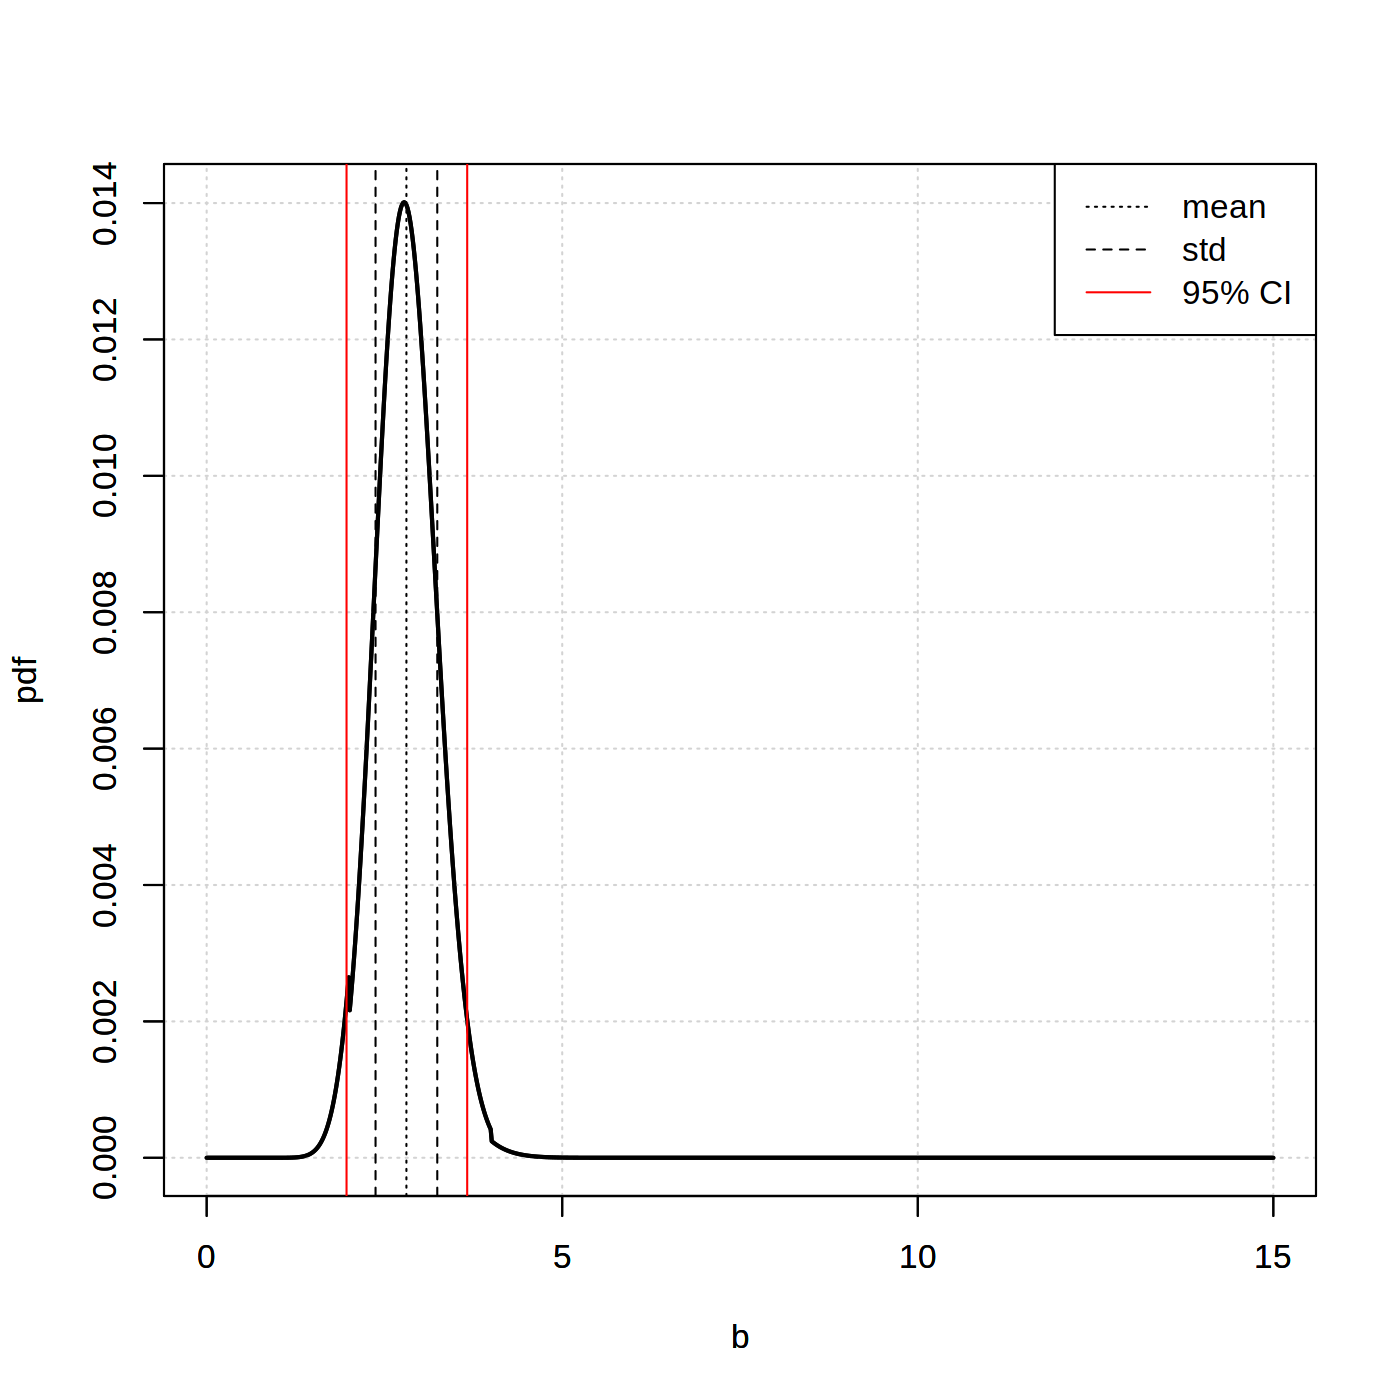

In [8]:
plot(b, posts, type='l', lwd=2, ylab='pdf')
grid() ; par(new=T)
plot(b, posts, type='l', lwd=2, ylab='pdf')
abline(v=c(post.m, post.m + post.sig, post.m - post.sig, cred.min, cred.max), lty=c(3, 2, 2, 1, 1), col=c('black','black','black','red','red'))
legend('topright', legend=c('mean', 'std', '95% CI'), lty=c(3, 2, 1), col=c('black', 'black', 'red'))

## d)

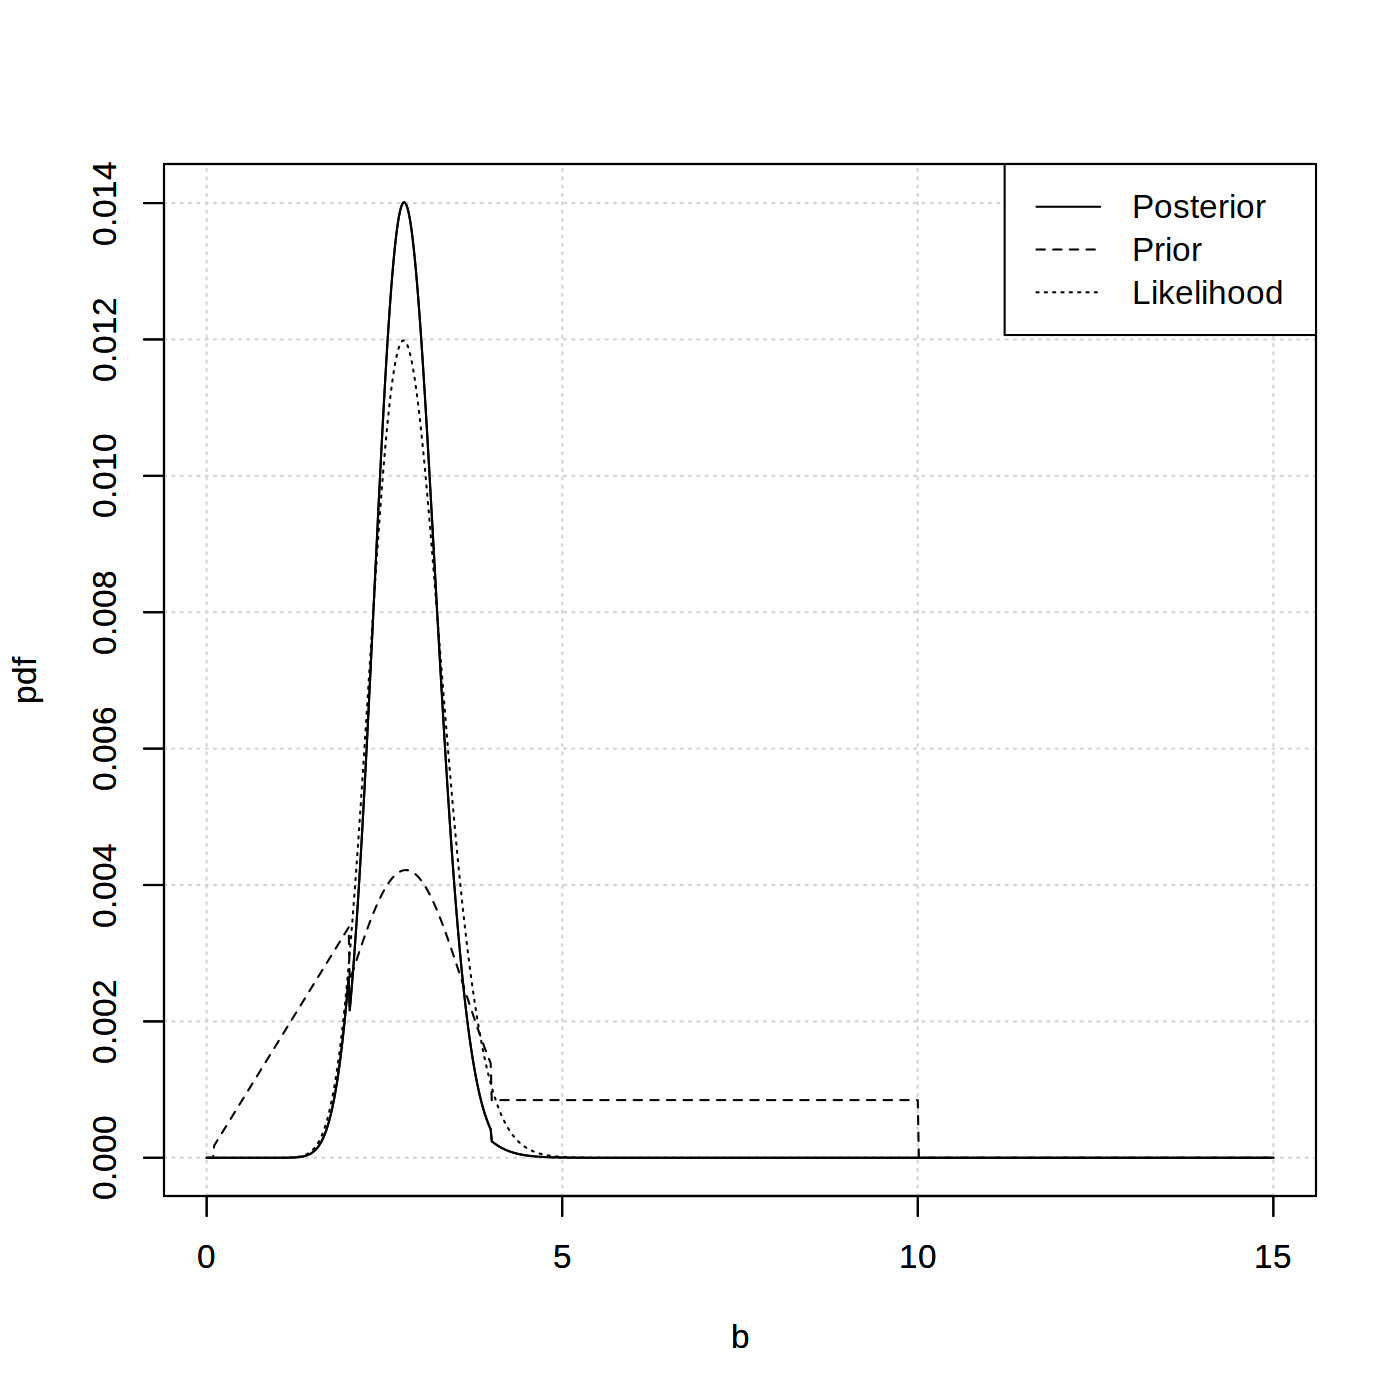

In [9]:
plot(b, posts, type='l', ylab='pdf')
grid() ; par(new=T)
plot(b, posts, type='l', ylab='pdf')
lines(b, priors / sum(priors), lty=2)
lines(b, likes / sum(likes), lty=3)
legend('topright', c('Posterior', 'Prior', 'Likelihood'), lty=c(1, 2, 3))

# Exercise 3

In [10]:
boxes <- vector(mode='list', length=6)
for (i in 1:6) {boxes[[i]] <- rep(c('W', 'B'), c(i - 1, 6 - i))}

N <- 40
sel.box <- boxes[[sample(1:6, 1)]]
samples <- sample(sel.box, N, replace=T)
w.count <- sum(samples=='W')
cat(sel.box, 'White draws:', w.count)
like <- dbinom(rep(w.count, 6), N, seq(0, 1, by=.2))
prior <- rep(1 / 6, 6)
post <- like * prior / sum(like * prior)
post

B B B B B White draws: 0

[1] 9.998671e-01 1.329051e-04 1.336572e-09 1.208765e-16 1.099365e-28
[6] 0.000000e+00

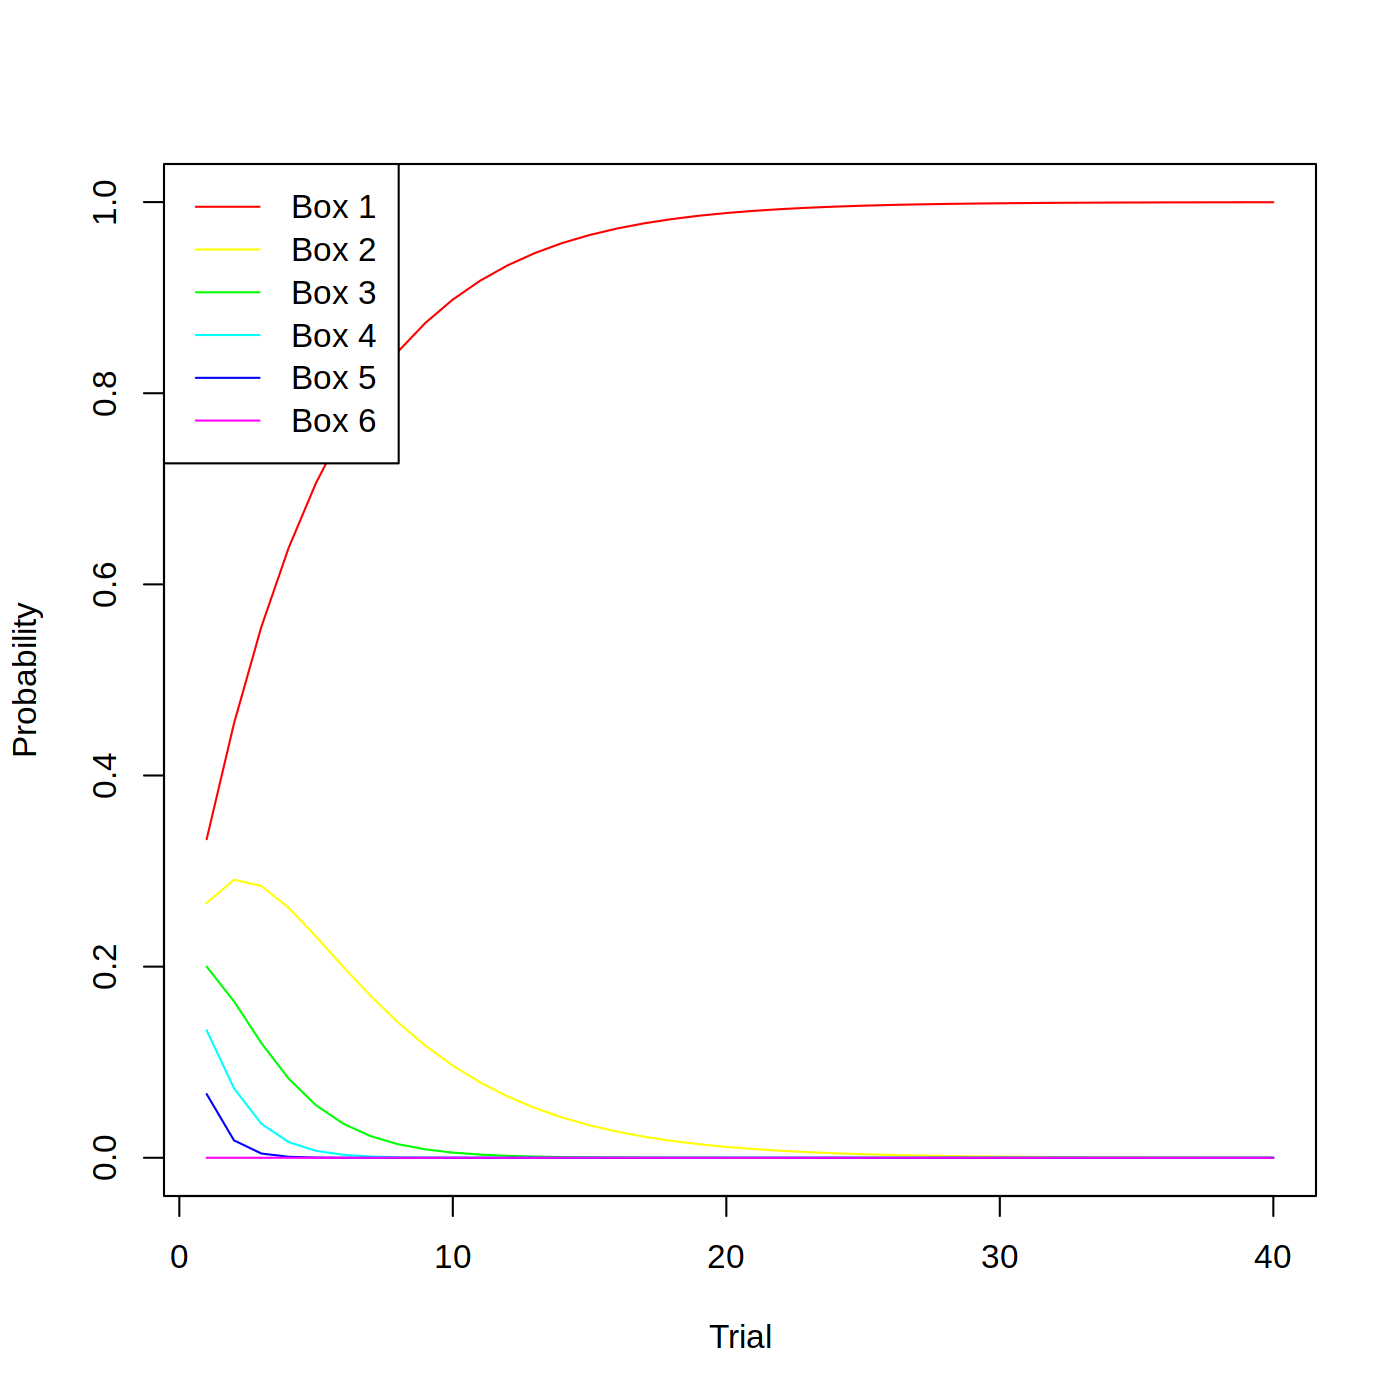

In [11]:
extraction <- 0
post <- matrix(0, N, 6)
for (i in 1:N) {
    extraction <- extraction + sum(sample(sel.box, 1)=='W')
    like <- dbinom(extraction, i, seq(0, 1, by=.2))
    post[i,] <- like * prior / sum(like * prior)
}
matplot(1:N, post, type='l', lty=1, col=rainbow(6), xlab='Trial', ylab='Probability')
legend('topleft', legend=c('Box 1', 'Box 2', 'Box 3', 'Box 4', 'Box 5', 'Box 6'), col=rainbow(6), lty=1)